In [1]:
import model

Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)


/root/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_cls_score/Reshape_1:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_2:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape_1:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
INFO:tensorflow:Restoring parameters from ctpn/models/VGGnet_fast_rcnn_iter_470000.ckpt


Using TensorFlow backend.


In [9]:
from glob import glob
from IPython.display import Image as display
import numpy as np
from PIL import Image
import time
paths = glob('./test/*.*')
paths

['./test/IMG_1563.JPG',
 './test/WechatIMG305.jpeg',
 './test/test.png',
 './test/CgQgIll5TaGADkiiAAFhxGXefcA951.jpg',
 './test/IMG_0689.JPG',
 './test/CgQgIlljJlyAF3fGAABk3TG5RM4164.jpg',
 './test/id1.jpg',
 './test/test2.png',
 './test/id2.png',
 './test/4.jpg',
 './test/demo-card-1.jpeg',
 './test/3bef1970fd6e4601a292d7b272128512.jpeg']

## pytorch crnn

It takes time:1.42790389061s
---------------------------------------
图像的文字朝向为:180度
识别结果:

“
me“逐
加加加F重:”减不wm-如E#--T
这样我可-幅到终点


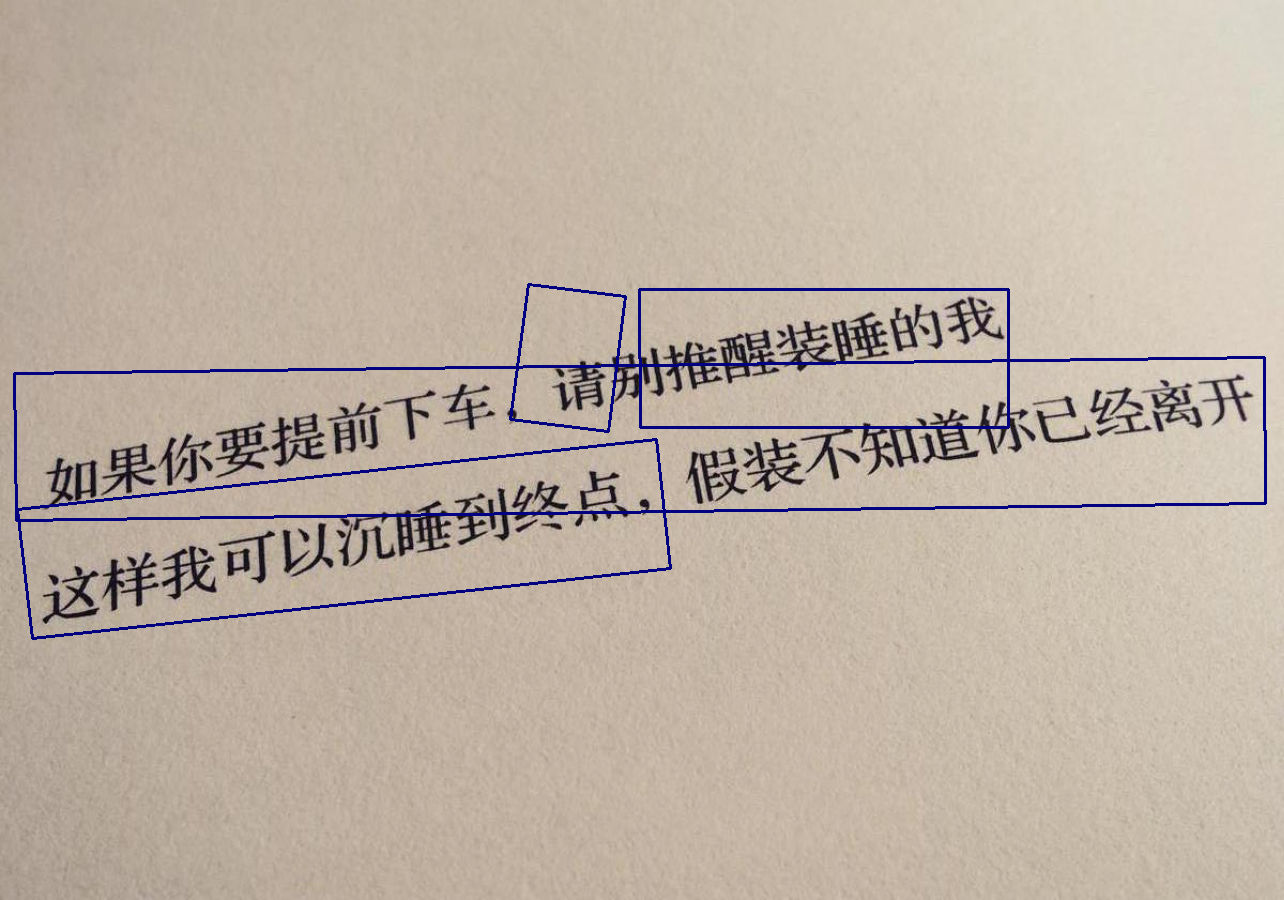

In [4]:
im = Image.open(paths[-2])
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='crnn', detectAngle=True) ## if model == crnn ,you should install pytorch
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
print "图像的文字朝向为:{}度\n".format(angle),"识别结果:\n"

for key in result:
    print result[key][1]
    
Image.fromarray(img)

## keras crnn 

It takes time:2.29568505287s
---------------------------------------
图像的文字朝向为:0度
识别结果:

林惠赐
民族汉
世性别男
出生。45年年5月2 日
住《广东省陆丰市遥西镇崔歧
村委会雀版村43号
4415221995 5234711
公民身份号码


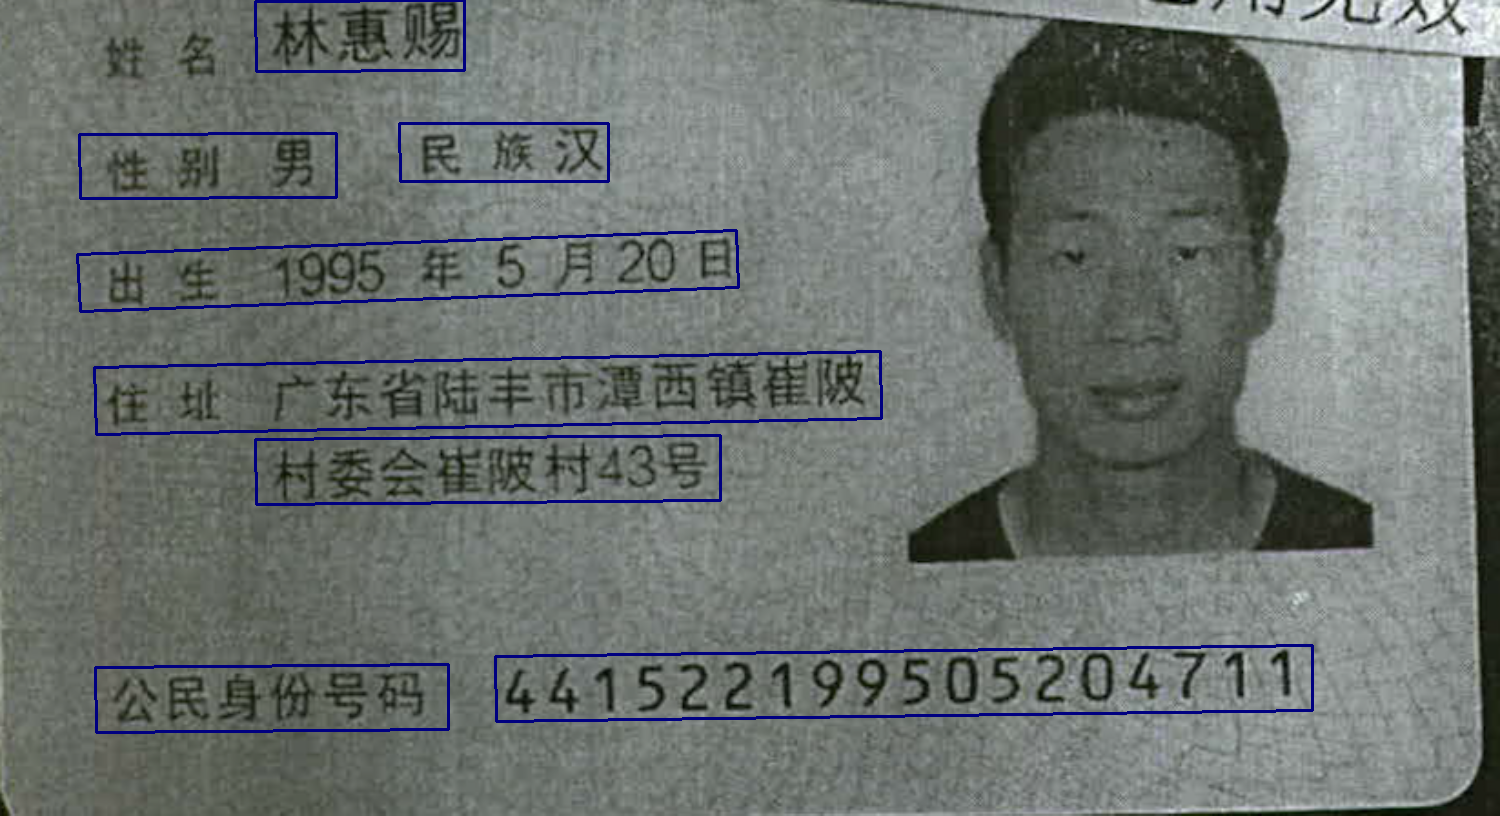

In [10]:
#im = Image.open(paths[-2])
im = Image.open(paths[-4])

img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='keras',detectAngle=True) ##if model == keras ,you should install keras
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
print "图像的文字朝向为:{}度\n".format(angle),"识别结果:\n"
for key in result:
    print result[key][1]
Image.fromarray(img)